In [1]:
import numpy as np
import pandas as pd
import json

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

import scipy
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import NonlinearConstraint


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from sklearn.model_selection import train_test_split
from DataPrep import data_prep, exp_data_collection, get_test_data

from InitialData_Gen import initialize

import GPy
import GPyOpt
from numpy.random import seed
from Predict import predict_internal

import random
import pickle

### Conversion values

In [2]:
import sys
myString = sys.path[0]
split_list = myString.split("/")
root = ''
for l in split_list[1:-2]:
    root = root +'/'+ l
    
main_file_path = root + '/RBDJ/'
carbon_source_fiepath = root + '/'

In [3]:
property_name = 'Specific Productivity'
N_round_input = 6 # 0, 1, 2, 3, 4, 5
Rounds_bfr_check = 6 # 0, 1, 2, 3, 4, 5
cut_off_round = 4
cont_kernel = 'Matern52'

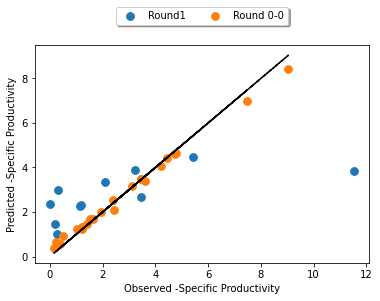

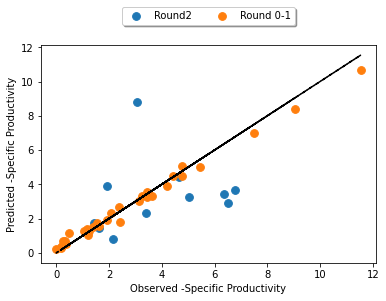

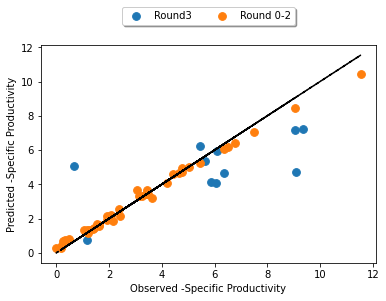

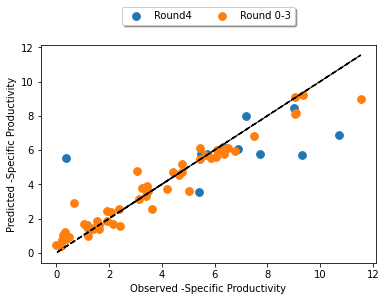

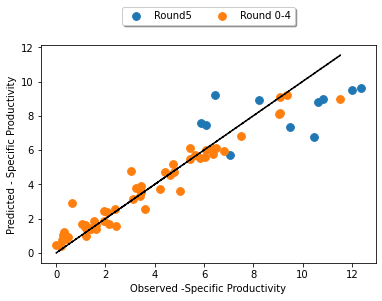

Why did I come here


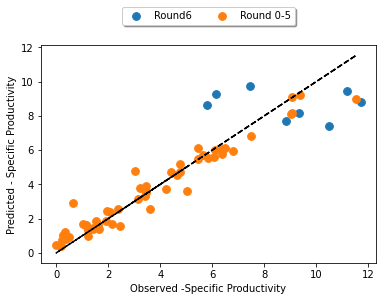

In [4]:
Train, Train_Std, Pred, Pred_Std, RMSEP, result_ts, Design, data, result = data_prep(main_file_path, 
                                                               N_round_input, Rounds_bfr_check,
                                                               cut_off_round, property_name)

{1: 2.6997251683307453, 2: 2.599632042825398, 3: 2.2755764693216696, 4: 2.398855445230687, 5: 2.2041842035754136, 6: 2.4300083559177086}


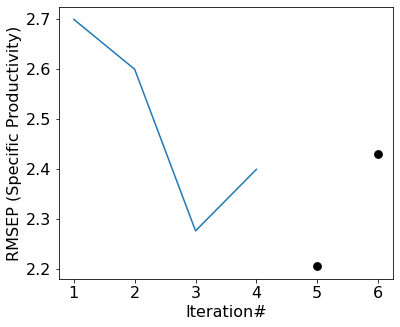

In [5]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 16}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (6,5)
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

plotting_Data = []

for i in range(N_round_input):
    plotting_Data.append(RMSEP[i+1])

plt.plot(np.arange(1,cut_off_round+1), plotting_Data[0:cut_off_round])

for i in range(cut_off_round, N_round_input):
    plt.scatter(i+1, plotting_Data[i], s= 60, c = 'k')


plt.xlabel('Iteration#')
plt.ylabel('RMSEP (Specific Productivity)')

print(RMSEP)

In [6]:
RMSEP_wt = []
for nr in range(1,6):
    wt = result_ts[nr]/np.max(result_ts[nr])
    SE = (Pred[nr]-result_ts[nr][:-1].reshape(-1,1))**2
    temp = np.sqrt(np.average(SE, axis = 0, weights = wt[:-1]))
    RMSEP_wt.append(temp)
    
nr =6
wt = result_ts[nr]/np.max(result_ts[nr])
SE = (Pred[nr]-result_ts[nr].reshape(-1,1))**2
temp = np.sqrt(np.average(SE, axis = 0, weights = wt))
RMSEP_wt.append(temp)

[array([4.93197345]), array([2.79966569]), array([2.22688348]), array([2.16512335]), array([2.28936863]), array([1.99343535])]


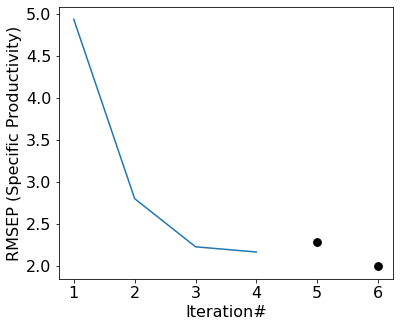

In [7]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16, 'axes.labelsize': 16}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (6,5)
fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

plotting_Data = []

for i in range(N_round_input):
    plotting_Data.append(RMSEP_wt[i])

plt.plot(np.arange(1,cut_off_round+1), plotting_Data[0:cut_off_round])

for i in range(cut_off_round, N_round_input):
    plt.scatter(i+1, plotting_Data[i], s= 60, c = 'k')


plt.xlabel('Iteration#')
plt.ylabel('RMSEP (Specific Productivity)')

print(RMSEP_wt)

In [8]:
rbdj_error_chart = {'Train': Train, 'Train_Std': Train_Std, 'Pred':Pred, 'Pred_Std': Pred_Std, 'RMSEP':RMSEP,
                    'result_ts': result_ts, 'Design': Design, 'data':data, 'result': result, 'RMSEP_wt': RMSEP_wt
    
}
import pickle
with open('RBDJ_ErrorChart.pkl', 'wb') as output:
    # Pickle dictionary using protocol 0.
    pickle.dump(rbdj_error_chart, output)

In [ ]:
Pred[5]

In [ ]:
Pred_Std[5]

In [ ]:
plt.figure()
for r in range(3):
    plt.scatter(Design[5][r].iloc[:,1], Design[5][r].iloc[:,2])


plt.legend(['R0', 'R1', 'R2'])

plt.figure()
for r in range(3):
    plt.scatter(Design[5][r].iloc[:,3], Design[5][r].iloc[:,4])